# Kickstarter.com Statistics

Analysis of Kickstarted data from 2013 to 2018.

The analysis presetend aims to extrapolate information about the plethora of  Kickstarted projects. The main questions investigated are: 

   * **What are the projects with highest success rate?**
   
   * **What are projects that gain the most?**
   
   * **What are the common elements (if any) that made a project successful?**
   
Data Source: [Kaggle.com](https://www.kaggle.com/kemical/kickstarter-projects)

![alt text](Summary.png)
>


### Step 1: Preparing the data
The data from kaggle are saved as `ks-projects-201801.csv`.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 15}

plt.rc('font', **font)

In [2]:
df=pd.read_csv('./kickstarter-projects/ks-projects-201801.csv')
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

The data contains:
   * **ID**: project identification
   * **name**: Project name
   * **main_category**: project's main category 
   * **Category**: sub-category of each project
   * **currency**
   * **Project deadline**
   * **Goal**: amount asked by the project author to achieve the project completion
   * **Pledged**: amount of money pledged by backers
   * **Launched**: Project starting date
   * **State**: successful/failed/cancelled
   * **Backers**: number of people who pledged money
   * **Country**
   * **USD pledged**: same as Pledged but in USD dollars (Convered by kickstarter)
   * **USD pledged Real**: conversion into USD dollars based on the currency conversion at the time of the project ended (see this [notebook](https://www.kaggle.com/tonyplaysguitar/convert-ks-pledges-to-usd/))
   * **USD goal Real**: some as Goal but in USD dollars

Here we will work only with a subsample of this data. 
As we will consider the amount pledged in our analysis, we will work only with USD dollar columns (`usd pledged`, `usd_pledged_real`,`usd_goal_real`). This will allow us to work with normalised information.
Timing information is useful to get an idea of the project completion, but we will transform them into datetime objects. 
At this stage, information about the country of the project is not necessary, so the relative column can be eliminated form this preliminary analysis.

Converting date information into datetime objects

In [3]:
df['prj_deadline']=pd.to_datetime(df['deadline'])
df['prj_start']=pd.to_datetime(df['launched'])

Dropping unnecesary columns

In [4]:
df_short=df.drop(['deadline','goal', 'launched','pledged','currency','usd pledged'],axis=1)
#summary statistics
df_short.describe()

,ID,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08


## Data Overview

Text(0.5, 0, 'Total Number of projects by category')

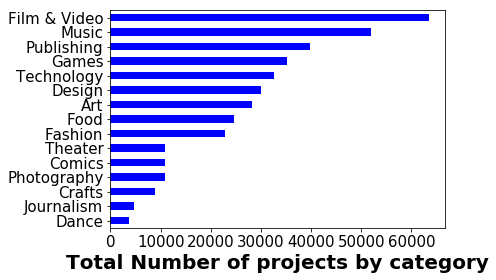

In [25]:
df_short.groupby('main_category')['ID'].count().sort_values().plot.barh(facecolor='b')
plt.ylabel('')
plt.xlabel('Total Number of projects by category',fontweight='bold',fontsize=20)

## Step 2: Grouping based on project status

In [6]:
success=df_short[df_short['state']=='successful']
#summary statistics
success.describe()

,ID,backers,usd_pledged_real,usd_goal_real
count,1.339560e+05,133956.000000,1.339560e+05,1.339560e+05
mean,1.073727e+09,263.921362,2.267080e+04,9.532853e+03
std,6.191514e+08,1504.580142,1.510903e+05,2.796144e+04
min,2.110900e+04,0.000000,7.900000e-01,1.000000e-02
25%,5.354443e+08,33.000000,2.000000e+03,1.301915e+03
50%,1.076595e+09,71.000000,5.107250e+03,3.837740e+03
75%,1.608161e+09,167.000000,1.323208e+04,1.000000e+04
max,2.147476e+09,219382.000000,2.033899e+07,2.015609e+06


In [7]:
Failed=df_short[df_short['state']=='failed']
#summary statistics
Failed.describe()

,ID,backers,usd_pledged_real,usd_goal_real
count,1.977190e+05,197719.000000,197719.000000,1.977190e+05
mean,1.074639e+09,16.422352,1320.603817,6.317474e+04
std,6.192215e+08,71.224123,6820.249351,1.435683e+06
min,5.971000e+03,0.000000,0.000000,1.500000e-01
25%,5.385642e+08,1.000000,2.640000,2.500000e+03
50%,1.073242e+09,3.000000,100.000000,7.500000e+03
75%,1.611052e+09,12.000000,663.000000,2.000000e+04
max,2.147467e+09,6550.000000,757352.940000,1.663614e+08


In [8]:
Cancelled=df_short[df_short['state']=='canceled']
#summary statistics
Cancelled.describe()

,ID,backers,usd_pledged_real,usd_goal_real
count,3.877900e+04,38779.000000,3.877900e+04,3.877900e+04
mean,1.076086e+09,25.987390,2.340522e+03,7.557942e+04
std,6.192748e+08,136.066726,1.352402e+04,1.281389e+06
min,9.215800e+04,0.000000,0.000000e+00,1.000000e-02
25%,5.409772e+08,0.000000,0.000000e+00,3.290090e+03
50%,1.079424e+09,3.000000,8.700000e+01,1.000000e+04
75%,1.611351e+09,15.000000,9.065350e+02,3.000000e+04
max,2.147388e+09,9326.000000,1.076751e+06,1.000000e+08


The next cell counts how many projects have been successful, failed, cancelled, suspended or an on-going at the time the data were taken. Here, the number of suspended projects are summed to those that have been cancelled. This is because the number of suspended projects is low and as no reasons are given within the data, therefore they will be considered as interrupted or cancelled.

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


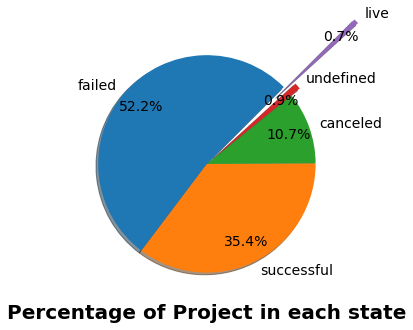

In [9]:

proj_status=df_short['state'].value_counts().reset_index()
proj_status.columns=['state','number_of_proj']
sum_otr=proj_status['number_of_proj'].iloc[5]+proj_status['number_of_proj'].iloc[2]
proj_status.drop(proj_status.index[5],axis=0,inplace=True)
proj_status['number_of_proj'].iloc[2]=sum_otr
explode=(0,0,0,0.1,0.9)
proj_status.plot.pie(y='number_of_proj',
                     labels=proj_status['state'],
                     explode=explode,
                     startangle=45,
                     shadow=True,
                     autopct='%1.1f%%',
                     legend=False,fontsize=14,pctdistance=0.8, labeldistance=1.1,figsize=(5, 5))
plt.xlabel("Percentage of Project in each state",fontsize=20,fontweight='bold')
plt.ylabel('');

Print number of projects in each status

In [10]:
proj_status

,state,number_of_proj
0,failed,197719
1,successful,133956
2,canceled,40625
3,undefined,3562
4,live,2799


# What are the projects with the highest success rate?
## Calculate the success rate

Success rate is defined as the number of successful project divided the total number of project in each category.

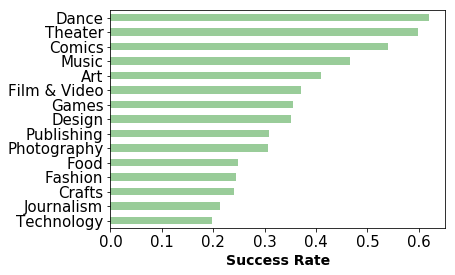

In [26]:
succ_rate=success['main_category'].value_counts()/df_short['main_category'].value_counts()
succ_rate.sort_values().plot.barh(facecolor='g',alpha=0.4)
plt.xlabel('Success Rate', fontsize=14, fontweight='bold');

Projects in the Dance and Theater category are those with the highest success rate, 62% and 60% respectively. Below the list of all the category with each percentage rate. The table is sorted in descending order to match the above graph.

In [12]:
round(succ_rate.sort_values(ascending=False)*100)

Dance           62.0
Theater         60.0
Comics          54.0
Music           47.0
Art             41.0
Film & Video    37.0
Games           36.0
Design          35.0
Publishing      31.0
Photography     31.0
Food            25.0
Fashion         25.0
Crafts          24.0
Journalism      21.0
Technology      20.0
Name: main_category, dtype: float64

### Compare Successful and Failed project in the Dance

On average, the successful projects in the Dance category ask for less money than the Failed one. For example, by comparing the mean value of the predicted cost of the project (`goal`) and the amount pledged, the Dance project that are succesful ask for a mean of $ 4,600 USD but the failed projects ask on average 3 times that values (a mean 15,396 USD).

In [91]:
success[success['main_category']=='Dance'][['usd_pledged_real', 'usd_goal_real']].mean()

usd_pledged_real    5194.016121
usd_goal_real       4601.094769
dtype: float64

In [93]:
Failed[Failed['main_category']=='Dance'][['usd_pledged_real', 'usd_goal_real']].mean()

usd_pledged_real      619.037109
usd_goal_real       15395.512874
dtype: float64

# What are the projects that gain the most?

In kickstarter.com, a project is successful if the money pledged by backers is at least equal to the goal set by the authour. This means that there are projects that pledged more than the requested goal. 
Here, we calculate the gain as:

$$gain_{\%}=\frac{amount~pledged - goal}{goal} * 100$$



In [28]:
success['gain%']=(success['usd_pledged_real']-success['usd_goal_real'])/success['usd_goal_real'] *100



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The code below selects only those projects that pledged 100% more than the proposed goal.

In [29]:
success[success['gain%']>100].groupby(['main_category'])['ID'].count().sort_values(ascending=False)

main_category
Games           6062
Design          4394
Technology      2658
Art             1973
Publishing      1862
Comics          1712
Music           1603
Film & Video    1375
Fashion         1271
Food             770
Crafts           706
Photography      494
Theater          250
Journalism       115
Dance             64
Name: ID, dtype: int64

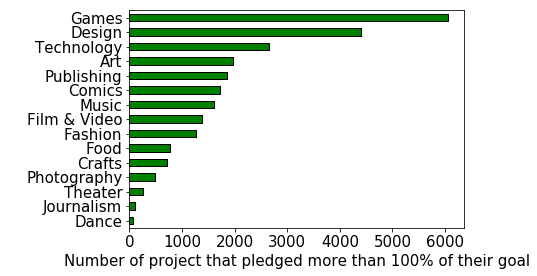

In [47]:
success[success['gain%']>100].groupby(['main_category'])['ID'].count().sort_values().plot.barh(facecolor='g',edgecolor='k')
plt.xlabel("Number of project that pledged more than 100% of their goal");
plt.ylabel(' ');

Several projects in the Games, Design and technology pledged more than the amount required by the authors. The list below shows the percentage of successful projects in each category that gained more than 100% of their initial goal.

In [43]:
round(success[success['gain%']>100].groupby(['main_category'])['ID'].count()/success['main_category'].value_counts() *100).sort_values(ascending=False)

Games           48.0
Design          42.0
Technology      41.0
Crafts          33.0
Comics          29.0
Fashion         23.0
Art             17.0
Publishing      15.0
Photography     15.0
Food            13.0
Journalism      11.0
Music            7.0
Film & Video     6.0
Theater          4.0
Dance            3.0
dtype: float64

The project that gained the most is "[VULFPECK /// The Beautiful Game](https://www.kickstarter.com/projects/1461914303/vulfpeck-the-beautiful-game/faqs)". The author set a 1 USD goal and he pledged 102,278 USD in 2 months.

In [55]:
i=success['gain%'].idxmax()
df_short.iloc[i]

ID                                          9509582
name                VULFPECK /// The Beautiful Game
category                                      Music
main_category                                 Music
state                                    successful
backers                                        3917
country                                          US
usd_pledged_real                             104278
usd_goal_real                                     1
prj_deadline                    2016-10-17 00:00:00
prj_start                       2016-08-18 09:04:03
Name: 369176, dtype: object

In [52]:
success.columns

Index(['ID', 'name', 'category', 'main_category', 'state', 'backers',
       'country', 'usd_pledged_real', 'usd_goal_real', 'prj_deadline',
       'prj_start', 'gain%'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Pledged (USD)')

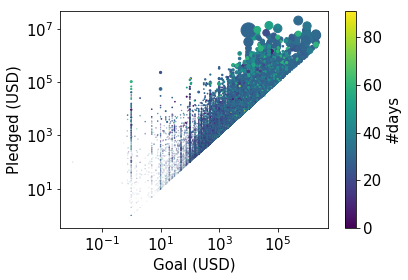

In [128]:
success['proj_length']=(success['prj_deadline']-success['prj_start']).dt.days
x=success['usd_goal_real']
y=success['usd_pledged_real']
s=success['backers']/1000
c=success['proj_length']

plt.scatter(x,y,s=s,c=c,cmap='viridis')
plt.colorbar(label="#days")
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Goal (USD)')
plt.ylabel('Pledged (USD)')



The prodject that pledged the most is [Pebble Time - Awesome Smartwatch](https://www.kickstarter.com/projects/getpebble/pebble-time-awesome-smartwatch-no-compromises)

In [72]:
i=success['usd_pledged_real'].idxmax()
df_short.iloc[i]

ID                                                        1799979574
name                Pebble Time - Awesome Smartwatch, No Compromises
category                                              Product Design
main_category                                                 Design
state                                                     successful
backers                                                        78471
country                                                           US
usd_pledged_real                                          2.0339e+07
usd_goal_real                                                 500000
prj_deadline                                     2015-03-28 00:00:00
prj_start                                        2015-02-24 15:44:42
Name: 157270, dtype: object

While the project with the highest number of backers is a card game in the Tabletop Games category: [Exploding Kittens](https://www.kickstarter.com/projects/elanlee/exploding-kittens?ref=nav_search&result=project&term=Exploding%20Kittens). This project had 219,382 backers and pledged $8,782,571 USD with a goal of 10,000 USD.

In [76]:
i=success['backers'].idxmax()
df_short.iloc[i]

ID                           1955357092
name                  Exploding Kittens
category                 Tabletop Games
main_category                     Games
state                        successful
backers                          219382
country                              US
usd_pledged_real            8.78257e+06
usd_goal_real                     10000
prj_deadline        2015-02-20 00:00:00
prj_start           2015-01-20 19:00:19
Name: 187652, dtype: object

# Summary

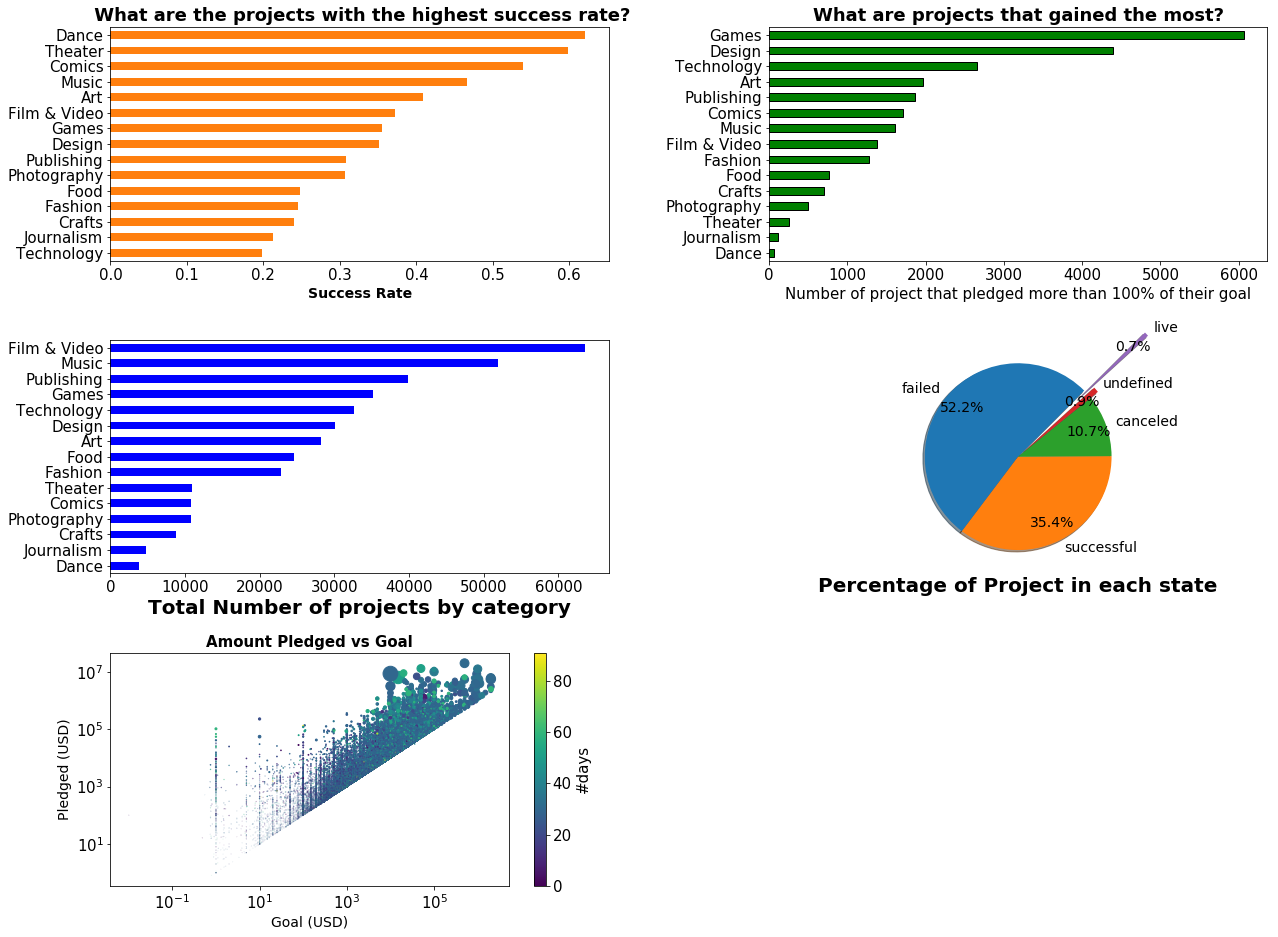

In [157]:
plt.figure(figsize=(18,17))

plt.subplot(4,2,1)
succ_rate=success['main_category'].value_counts()/df_short['main_category'].value_counts()
succ_rate.sort_values().plot.barh(facecolor='C1')
plt.xlabel('Success Rate', fontsize=14, fontweight='bold');

plt.title(' What are the projects with the highest success rate?',fontsize=18,fontweight='bold')
plt.tight_layout()


plt.subplot(4,2,2)
success[success['gain%']>100].groupby(['main_category'])['ID'].count().sort_values().plot.barh(facecolor='g',edgecolor='k')
plt.xlabel("Number of project that pledged more than 100% of their goal");
plt.ylabel(' ');
plt.title('What are projects that gained the most?',fontsize=18,fontweight='bold')
plt.tight_layout()

plt.subplot(4,2,3)

df_short.groupby('main_category')['ID'].count().sort_values().plot.barh(facecolor='b')
plt.ylabel('')
plt.xlabel('Total Number of projects by category',fontweight='bold',fontsize=20)
plt.tight_layout()

ax=plt.subplot(4,2,4)
proj_status.plot.pie(y='number_of_proj',
                     labels=proj_status['state'],
                     explode=explode,
                     startangle=45,
                     shadow=True,
                     autopct='%1.1f%%',
                     legend=False,fontsize=14,pctdistance=0.8, labeldistance=1.1,ax=ax)
plt.xlabel("Percentage of Project in each state",fontsize=20,fontweight='bold')
plt.ylabel('');
plt.tight_layout()
plt.subplot(4,2,5)
plt.scatter(x,y,s=s,c=c,cmap='viridis')
plt.colorbar(label="#days")
plt.xscale('log')
plt.yscale('log')
plt.title('Amount Pledged vs Goal',fontsize=15,fontweight='bold')
plt.xlabel('Goal (USD)',fontsize=14)
plt.ylabel('Pledged (USD)',fontsize=14)
plt.tight_layout()
plt.savefig('Summary.png')